# Notebook for calculating the average slope for a lightcurve, and plotting its distribution

In [1]:
def slope(group):
    """
    finds slope m in line y=mx+c
    """

    group        = group.dropna()
    mag          = group['mag']
    magerr_invsq = group['magerr']**-2
    t            = group['mjd']

    t_optimal = (t*magerr_invsq).sum()/magerr_invsq.sum()
    m_optimal = (mag*(t-t_optimal)*magerr_invsq).sum()/((t-t_optimal)**2*magerr_invsq).sum()

    m_regular = ((t-t.mean())*(mag-mag.mean())).sum()/((t-t.mean())**2).sum()

    return {'m_optimal':m_optimal,'m_regular':m_regular}


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
# from profilestats import profile
from scipy.stats import binned_statistic
from funcs.analysis import *
from os import listdir
import os
data_path = '/disk1/hrb/python/'
import time

In [3]:
def reader(n_subarray):
    return pd.read_csv(wdir+'data/merged/qsos/{}_band/lc_{}.csv'.format(band,n_subarray), nrows=None, index_col = 'uid', dtype = {'catalogue': np.uint8, 'mag': np.float32, 'magerr': np.float32, 'mjd': np.float64, 'uid': np.uint32})

In [4]:
band = 'r'
ID = 'uid'
dr = analysis(ID)
dr.read_in(reader)

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
# boolean = (dr.df['catalogue']==1)
# boolean = (df['cat']==6) | (df['cat']==10)
# boolean = (df['cat']==9) | (df['cat']==11)

In [ ]:
# result_rf = dr.df[boolean].groupby('uid').apply(slope).apply(pd.Series)
result_obs = dr.df.groupby('uid').apply(slope).apply(pd.Series)

In [ ]:
result_obs.to_csv(wdir + 'data/computed/qsos/slopes/slopes_obsframe.csv')

In [11]:
result_obs = pd.read_csv('../data/computed/qsos/slopes/slopes_obsframe_all.csv', index_col='uid')
result_obs = result_obs[abs(result_obs['m_optimal'])<0.5]
print('All surveys (observer frame)\n')
print('optimal slope mean:   {:.9f} mag/decade\nregular slope mean:   {:.9f} mag/decade'.format(*result_obs.mean()*3650))
print('optimal slope median: {:.9f} mag/decade\nregular slope median: {:.9f} mag/decade'.format(*result_obs.median()*3650))


All surveys (observer frame)

optimal slope mean:   -0.068084908 mag/decade
regular slope mean:   -0.084073950 mag/decade
optimal slope median: -0.071829511 mag/decade
regular slope median: -0.088481886 mag/decade


In [7]:
result_obs_ztf = pd.read_csv('../data/computed/qsos/slopes/slopes_obsframe_all.csv', index_col='uid')
result_obs_ztf = result_obs_ztf[abs(result_obs_ztf['m_optimal'])<0.5]
print('ZTF (observer frame)\n')
print('optimal slope mean:   {:.9f} mag/decade\nregular slope mean:   {:.9f} mag/decade'.format(*result_obs_ztf.mean()*3650))
print('optimal slope median: {:.9f} mag/decade\nregular slope median: {:.9f} mag/decade'.format(*result_obs_ztf.median()*3650))


ZTF (observer frame)

optimal slope mean:   -0.068084908 mag/decade
regular slope mean:   -0.084073950 mag/decade
optimal slope median: -0.071829511 mag/decade
regular slope median: -0.088481886 mag/decade


In [12]:
result_rf_ztf = pd.read_csv('../data/computed/qsos/slopes/slopes_restframe_ztf.csv', index_col='uid')
result_rf_ztf = result_rf_ztf[abs(result_rf_ztf['m_optimal'])<0.5]
print('ZTF (rest frame)\n')
print('optimal slope mean:   {:.9f} mag/decade\nregular slope mean:   {:.9f} mag/decade'.format(*result_rf_ztf.mean()*3650))
print('optimal slope median: {:.9f} mag/decade\nregular slope median: {:.9f} mag/decade'.format(*result_rf_ztf.median()*3650))


ZTF (rest frame)

optimal slope mean:   0.114430053 mag/decade
regular slope mean:   0.198490230 mag/decade
optimal slope median: 0.170160380 mag/decade
regular slope median: 0.244663255 mag/decade


In [14]:
result_rf = pd.read_csv('../data/computed/qsos/slopes/slopes_restframe_all.csv', index_col='uid')
result_rf = result_rf[abs(result_rf['m_optimal'])<0.5]
print('All surveys (rest frame)\n')
print('optimal slope mean:   {:.9f} mag/decade\nregular slope mean:   {:.9f} mag/decade'.format(*result_rf.mean()*3650))
print('optimal slope median: {:.9f} mag/decade\nregular slope median: {:.9f} mag/decade'.format(*result_rf.median()*3650))


All surveys (rest frame)

optimal slope mean:   -0.239226260 mag/decade
regular slope mean:   -0.237967242 mag/decade
optimal slope median: -0.187042881 mag/decade
regular slope median: -0.230384636 mag/decade


In [19]:
result_rf_ztf.sort_values('m_optimal').head(20).index

Int64Index([ 45105,  32780, 395826, 435243, 500535, 474873, 156584, 498479,
            162143, 176194, 141474,  28614, 199443, 445694,  84062, 131556,
            330190, 310895,  20202, 280094],
           dtype='int64', name='uid')

No handles with labels found to put in legend.


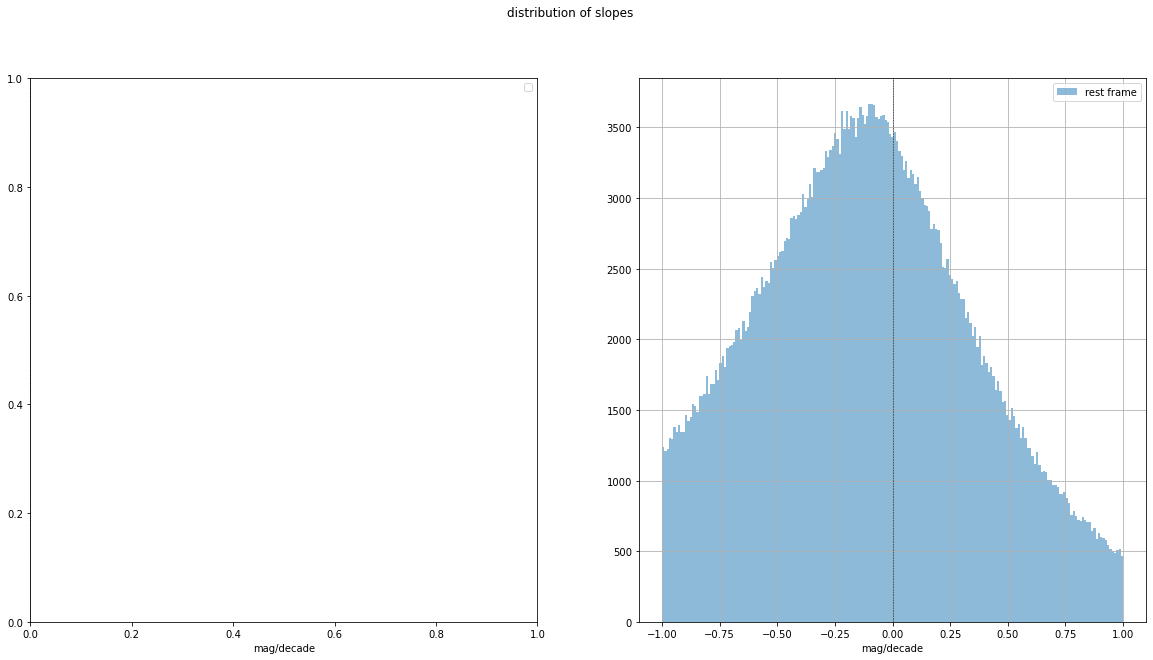

In [15]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
range=(-1,1)
bins=201
# (result_obs    ['m_optimal']*3650).hist(range=range, ax=ax[0], bins=bins, alpha=0.5, label='observers frame')
# (result_obs_ztf['m_optimal']*3650).hist(range=range, ax=ax[0], bins=bins, alpha=0.5, label='observers frame (ztf)')
(result_rf     ['m_optimal']*3650).hist(range=range, ax=ax[1], bins=bins, alpha=0.5, label='rest frame')
# (result_rf_ztf ['m_optimal']*3650).hist(range=range, ax=ax[1], bins=bins, alpha=0.5, label='rest frame (ztf)')
for axis in ax:
    axis.set(xlabel='mag/decade')
    axis.legend()
    axis.axvline(x=0, color='k', ls='--', lw=0.5)
plt.suptitle('distribution of slopes');

/disk1/hrb/anaconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  This is separate from the ipykernel package so we can avoid doing imports until


[None, (2.2419918069666744, 1000000), (0.0, 2.0)]

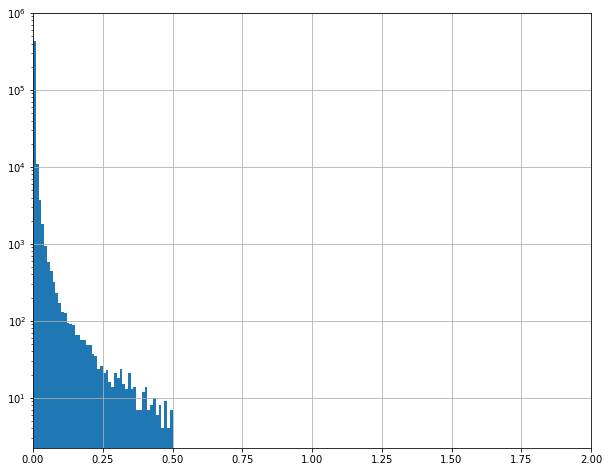

In [136]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
abs(result['m_optimal']).hist(bins=200, ax=ax, range=(0,2))
ax.set(yscale='log',ylim=[0,1000000], xlim=[0,2])